Write a program to do following: Data Set:
https://www.kaggle.com/shwetabh123/mall-customers This dataset givesthe
data of Income and money spent by the customers visiting a shopping mall.
The data set contains Customer ID, Gender, Age, Annual Income, Spending
Score. Therefore, asa mall owner you need to find the group of people who
are the profitable customers for the mallowner. Apply at least two clustering
algorithms (based on Spending Score) to find the group ofcustomers.

a) Apply Data pre-processing
CO6  L2

b) Perform data-preparation (Train-Test Split)

c) Apply Machine Learning Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Load and Inspect the Dataset**

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


****

In [4]:
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
print(df.dtypes)

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


**Data Pre-processing (CO6 L2)**

In [7]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print(scaled_features[:5])

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


**Train-Test Split**

In [9]:
x_train, x_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

**Clustering Algorithms**

**a) K-Means Clustering**

In [11]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train)
    inertia.append(kmeans.inertia_)

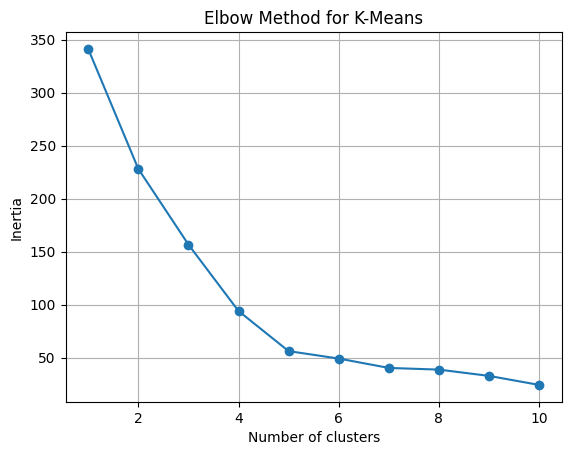

In [12]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

In [14]:
df['KMeans_Cluster'] = kmeans_labels

**b) Gaussian Mixture Model (GMM)**

In [15]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(scaled_features)

In [16]:
df['GMM_Cluster'] = gmm_labels

**Visualize Clusters**

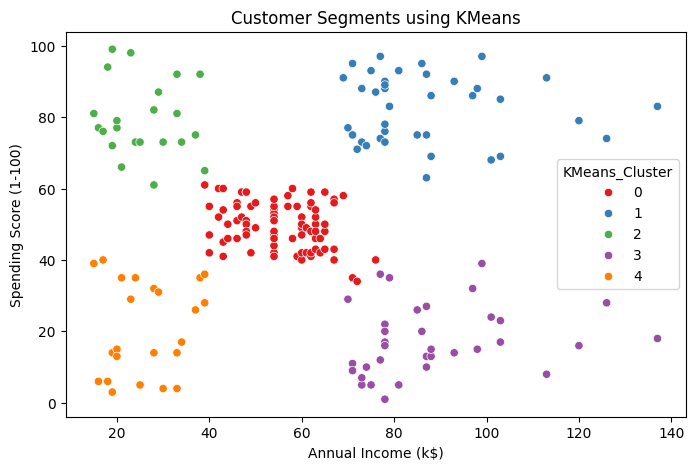

In [17]:
# KMeans Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='Set1')
plt.title('Customer Segments using KMeans')
plt.show()

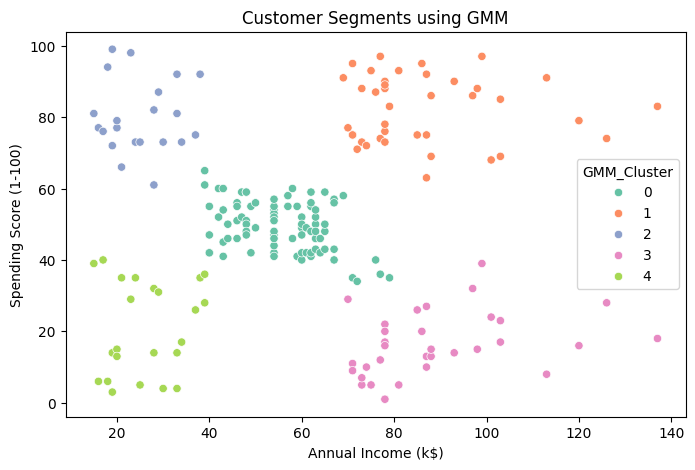

In [18]:
# GMM Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='GMM_Cluster', palette='Set2')
plt.title('Customer Segments using GMM')
plt.show()